Load dependecies and functions

In [138]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw
import matplotlib.pyplot as plt
import textwrap
import numpy as np


def draw_molecule_grid(df, smiles_col, name_col, distance_col, n_cols=5, max_name_width=25, save_path=None):
    # Sort the dataframe by 'Distance' column
    df = df.sort_values(by=distance_col).reset_index(drop=True)
    
    # Number of rows and columns
    n_rows = len(df) // n_cols + int(len(df) % n_cols > 0)
    
    # Set up figure dimensions and quality
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*3, n_rows*3), dpi=300)
    axes = axes.flatten() if isinstance(axes, np.ndarray) else [axes]  # Flatten axes for easy iteration

    # Loop through each molecule
    for i, (index, row) in enumerate(df.iterrows()):
        mol = Chem.MolFromSmiles(row[smiles_col])
        
        if mol is not None:
            # Draw molecule as image
            img = Draw.MolToImage(mol, size=(300, 300), kekulize=True)
            ax = axes[i]
            ax.imshow(img)
            ax.axis('off')
            
            # Prepare and wrap name and distance information for the title
            name = str(row[name_col]) if pd.notna(row[name_col]) else "Unnamed Molecule"
            wrapped_name = textwrap.fill(name, width=max_name_width)
            subtitle = f"{wrapped_name}\nDistance: {row[distance_col]:.2f}"
            ax.set_title(subtitle, fontsize=8)
    
    # Hide any empty subplots if there are more axes than molecules
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')
    
    # Adjust layout to minimize whitespace between subplots
    plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05, wspace=0.1, hspace=0.4)
    
    # Save the figure with tight bounding box and no padding
    if save_path:
        plt.savefig(save_path, format="png", dpi=600, bbox_inches='tight', pad_inches=0.1)

    # Optionally show the plot if not saving directly
    plt.show()


Define input

In [139]:
# Input here a the name of your output file generated in from calculate_dist (w/o .csv)
table = 'example'
# Input here a filename for your output png (without .png)
out_name = 'example.png'
df = pd.read_csv(table + '.csv')

Draw molecules

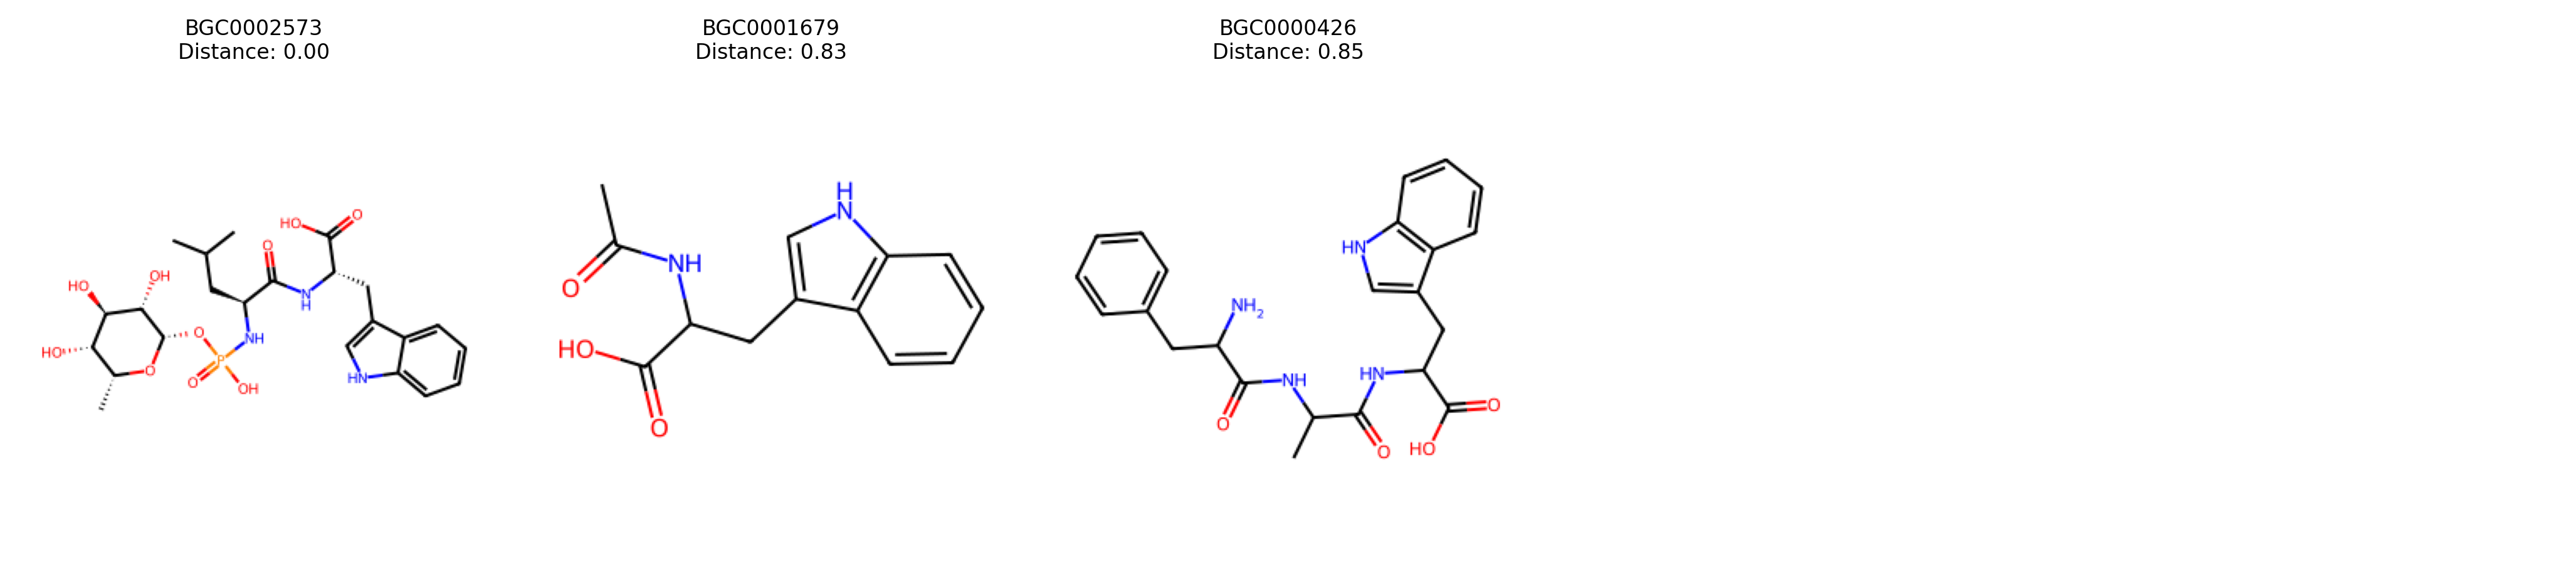

In [140]:
# Save the plot directly in the function
draw_molecule_grid(df, smiles_col='smiles', name_col='mibig_accession', distance_col='distance', save_path=out_name)